# Instructions
- Some parts of the code are already done for you
- You need to execute all the cells
- You need to add the code where ever you see `"#### Add your code here ####"`
- Marks are mentioned along with the cells

# Face detection
Task is to predict the boundaries(mask) around the face in a given image.

## Dataset
Faces in images marked with bounding boxes. Have around 500 images with around 1100 faces manually tagged via bounding box.

### Mount Google drive if you are using google colab
- We recommend using Google Colab as you can face memory issues and longer runtimes while running on local

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Change current working directory to project folder

In [2]:
import os

path = '/content/drive/My Drive/Project/CNN Face Detection'
try:  
    os.chdir(path)
    print("Directory changed to Project folder")
except OSError:
    print("Can't change the Current Working Directory")

Directory changed to Project folder


### Load the "images.npy" file
- This file contains images with details of bounding boxes

In [0]:
import numpy as np
data = np.load('/content/drive/My Drive/Deep Learning/images.npy',allow_pickle=True)

### Check one sample from the loaded "images.npy" file

In [4]:
data.shape # This array consists of 409 rows and 2 columns

(409, 2)

In [5]:
# Checking the shape of the 10th input image
n=10
data[n][0].shape  

(337, 600, 3)

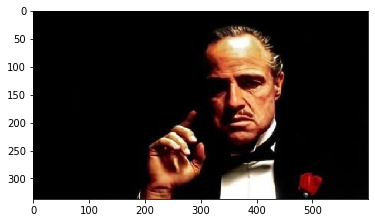

In [6]:
# This means that this is an RGB dataset and the said image is having 337 X 600 pixels in each channnels
# Viewing the original image
from matplotlib import pyplot as plt
img_array = data[n][0]
plt.imshow(img_array)
plt.show()

In [7]:
# Checking the mask for the given image
data[n][1]

[{'imageHeight': 337,
  'imageWidth': 600,
  'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.48, 'y': 0.10385756676557864},
   {'x': 0.7716666666666666, 'y': 0.6795252225519288}]}]

### Set image dimensions
- Initialize image height, image width with value: 224 

In [0]:
IMAGE_WIDTH = 224
IMAGE_HEIGHT = 224

### Create features and labels
- Here feature is the image
- The label is the mask
- Images will be stored in "X_train" array
- Masks will be stored in "masks" array

In [9]:
import cv2
from tensorflow.keras.applications.mobilenet import preprocess_input

masks = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH))
X_train = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH, 3))
for index in range(data.shape[0]):
    img = data[index][0]
    img = cv2.resize(img, dsize=(IMAGE_HEIGHT, IMAGE_WIDTH), interpolation=cv2.INTER_CUBIC)
    try:
      img = img[:, :, :3]
    except:
      continue
    X_train[index] = preprocess_input(np.array(img, dtype=np.float32))
    for i in data[index][1]:
        x1 = int(i["points"][0]['x'] * IMAGE_WIDTH)
        x2 = int(i["points"][1]['x'] * IMAGE_WIDTH)
        y1 = int(i["points"][0]['y'] * IMAGE_HEIGHT)
        y2 = int(i["points"][1]['y'] * IMAGE_HEIGHT)
        masks[index][y1:y2, x1:x2] = 1

### Print the shape of X_train and mask array

In [10]:
print("X_train shape : ",X_train.shape)

X_train shape :  (409, 224, 224, 3)


In [11]:
print("masks array shape : ",masks.shape)

masks array shape :  (409, 224, 224)


### Print a sample image and image array

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  ...
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]]

 [[-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  ...
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]]

 [[-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  ...
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]]

 ...

 [[-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  ...
  [-0.96862745 -0.96862745 -0.96862745]
  [-0.96078432 -0.96078432 -0.96078432]
  [-0.96078432 -0.96078432 -0.96078432]]

 [

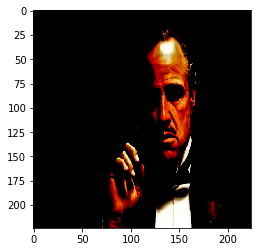

In [12]:
# After reshaping the image to 224 X 224 let's view it
from matplotlib import pyplot
n = 10
print(X_train[n])
pyplot.imshow(X_train[n])

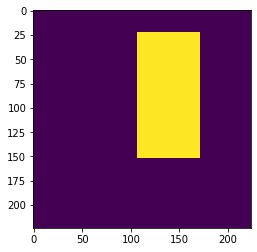

In [13]:
# Viewing the given mask for the said input image
pyplot.imshow(masks[n]) # We are able to see that the portion having the face in the image is coloured as yellow and the rest portion as purple

## Create the model
- Add MobileNet as model with below parameter values
  - input_shape: IMAGE_HEIGHT, IMAGE_WIDTH, 3
  - include_top: False
  - alpha: 1.0
  - weights: "imagenet"
- Add UNET architecture layers
  - This is the trickiest part of the project, you need to research and implement it correctly

In [0]:
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.layers import Concatenate, UpSampling2D, Conv2D, Reshape
from tensorflow.keras.models import Model


def create_model(trainable=True):
    ALPHA = 1.0
    model = MobileNet(input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3), include_top=False, alpha=ALPHA, weights="imagenet") # Load pre-trained mobilenet
    for layer in model.layers:
        layer.trainable = trainable
    HEIGHT_CELLS = 224
    WIDTH_CELLS = 224
    # Add all the UNET layers here

# Initializing some blocks whose layer names are collected from the architecture. 
    block1 = model.input
    block2 = model.get_layer("conv_pw_1_relu").output
    block3 = model.get_layer("conv_pw_3_relu").output
    block4 = model.get_layer("conv_pw_5_relu").output
    block5 = model.get_layer("conv_pw_11_relu").output
    block6 = model.get_layer("conv_pw_13_relu").output

# So following UNET architecture we concatenate the upsampled feature map of a layer with the downsampled feature map present in the same layer.
    x = Concatenate()([UpSampling2D()(block6), block5])
    x = Concatenate()([UpSampling2D()(x), block4])
    x = Concatenate()([UpSampling2D()(x), block3])
    x = Concatenate()([UpSampling2D()(x), block2])
    x = Concatenate()([UpSampling2D()(x), block1])

# We use activation function as sigmoid in this case
    x = Conv2D(1, kernel_size=1, activation="sigmoid")(x)
    x = Reshape((HEIGHT_CELLS, WIDTH_CELLS))(x)
# Reshaping the predicted mask as the shape of the expected mask. 

    return Model(inputs=model.input, outputs=x)

### Call the create_model function

In [15]:
# Give trainable=False as argument, if you want to freeze lower layers for fast training (but low accuracy)
model = create_model()

# Print summary
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 32) 864         conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 32) 128         conv1[0][0]                      
_____________

### Define dice coefficient function
- Create a function to calculate dice coefficient


In [0]:
import tensorflow as tf
def dice_coefficient(y_true, y_pred):
    numerator = 2 * tf.reduce_sum(y_true * y_pred)
    denominator = tf.reduce_sum(y_true + y_pred)
    return numerator / (denominator + tf.keras.backend.epsilon())

### Define loss

In [0]:
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.backend import log, epsilon
def loss(y_true, y_pred):
    return binary_crossentropy(y_true, y_pred) - log(dice_coefficient(y_true, y_pred) + epsilon())

### Compile the model
- Complie the model using below parameters
  - loss: use the loss function defined above
  - optimizers: use Adam optimizer
  - metrics: use dice_coefficient function defined above

In [0]:
from tensorflow.keras.optimizers import Adam
optimizer = Adam()
model.compile(loss=loss, optimizer=optimizer, metrics=[dice_coefficient])

### Define checkpoint and earlystopping

In [19]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
checkpoint = ModelCheckpoint("model-{loss:.2f}.h5", monitor="loss", verbose=1, save_best_only=True,
                             save_weights_only=True, mode="min", period=1)
stop = EarlyStopping(monitor="loss", patience=5, mode="min")
reduce_lr = ReduceLROnPlateau(monitor="loss", factor=0.2, patience=5, min_lr=1e-6, verbose=1, mode="min")

### Fit the model
- Fit the model using below parameters
  - epochs: you can decide
  - batch_size: 1
  - callbacks: checkpoint, reduce_lr, stop

In [0]:
EPOCHS = 15
BATCH_SIZE = 1

In [21]:
# Fit the model
history = model.fit(X_train, masks, validation_split=0.20, epochs=EPOCHS, batch_size=BATCH_SIZE,callbacks=[checkpoint, reduce_lr, stop])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 327 samples, validate on 82 samples
Epoch 1/15
325/327 [============================>.] - ETA: 0s - loss: 1.2881 - dice_coefficient: 0.5005
Epoch 00001: loss improved from inf to 1.28517, saving model to model-1.29.h5
327/327 [==============================] - 23s 69ms/sample - loss: 1.2852 - dice_coefficient: 0.5010 - val_loss: 0.9371 - val_dice_coefficient: 0.5864
Epoch 2/15
326/327 [============================>.] - ETA: 0s - loss: 0.8608 - dice_coefficient: 0.6046
Epoch 00002: loss improved from 1.28517 to 0.85947, saving model to model-0.86.h5
327/327 [==============================] - 16s 47ms/sample - loss: 0.8595 - dice_coefficient: 0.6052 - val_loss: 0.9391 - val_dice_coefficient: 0.5601
Epoch 3/15
325/327 [============================>.] - ETA: 0s - loss: 0.7199 - dice_coefficient: 0.6528
Epoch 00003: loss improved from 0.85947 to 0.71911, saving model to model-0.72.h5
327/3

dict_keys(['loss', 'dice_coefficient', 'val_loss', 'val_dice_coefficient', 'lr'])


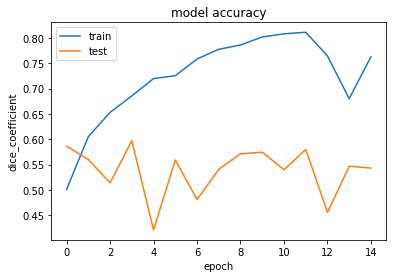

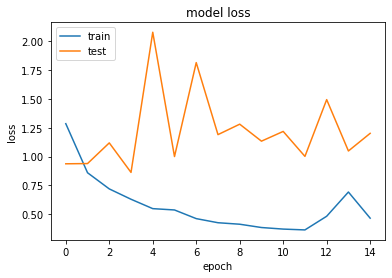

In [22]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['dice_coefficient'])
plt.plot(history.history['val_dice_coefficient'])
plt.title('model accuracy')
plt.ylabel('dice_coefficient')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Get the predicted mask for a sample image

In [0]:
n = 10
sample_image = X_train[n]
region = model.predict(x=np.array([sample_image]))[0]

### Impose the mask on the image

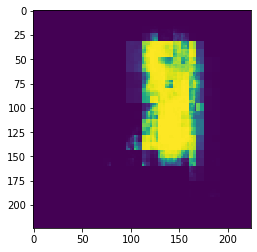

In [25]:
pyplot.imshow(region) # viewing the predicted mask

In [0]:
sm = sample_image.copy()
reg = region.copy()
image = sm

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


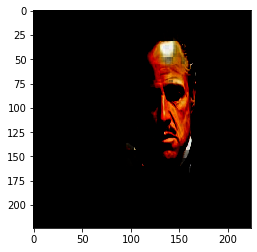

In [27]:
sm[:,:,0] = reg*image[:,:,0]
sm[:,:,1] = reg*image[:,:,1]
sm[:,:,2] = reg*image[:,:,2]
out_image=sm
plt.imshow(out_image)

**Conclusion**

In this we project build a face detection model which includes building a face detector to locate the position of a face in an image. 
We performed transfer learning on Mobile Net model which is already trained to perform object detection. To be able to train the Mobile Net model for face detection, we used WIDER FACE dataset which already has the bounding box data for various images with a 
single face and multiple faces. The output of the model is the bounding box data which gives the location of the face in an image.

In this project each image is an RGB image that is each image having 3 channels of pixel arrays. We have resized each images to 224 X 224 X 3 pixels and also resized the masks to 224 X 224 pixels. We followed UNET architecture for adding the layers. We choose activation function as sigmoid at the output layer. We chose dice-coefficient for measuring the accuracy of this model. We trained our model on 15 epochs and observed the graph. The best result is obtained during 10-12 epochs where the loss is low and accuracy is high. On imposing the mask on the image we got the face located properly.
For betterment of the model we need to have more data with different variety of faces.
